In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isna().sum()

x    0
y    1
dtype: int64

## Data Processing

In [8]:
data.dropna(inplace = True)
data.shape

(699, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


## Splitting Data

In [13]:
# Training input and output
train_x = np.array(data.x[0:500]).reshape(500,1)
train_y = np.array(data.y[0:500]).reshape(500,1)

In [20]:
# Test data input and output
test_x = np.array(data.x[500:]).reshape(199,1)
test_y = np.array(data.y[500:]).reshape(199,1)

In [22]:
print("Training X ",train_x.shape)
print("Training Y ",train_y.shape)
print("Tesing X ",test_x.shape)
print("Testing Y ",test_y.shape)

Training X  (500, 1)
Training Y  (500, 1)
Tesing X  (199, 1)
Testing Y  (199, 1)


# <font color="green">Linear Regression</font>

## Forward Propogation
### Hypothesis : - f(x) = m*x + c

In [23]:
def forward_prop(train_x, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m, train_x) + c
    
    return predictions

## Cost Function
Cost fn = 1/2n * sum(predicted(y) - actual(y))^2

In [24]:
def cost_func(predictions, train_y):
    
    cost = np.mean((predictions - train_y)**2) * 0.5
    return cost

## Gradient Descent for BackPropagation

In [34]:
def back_prop(train_x, train_y, predictions):
    
    derivatives = dict()
    
    df = predictions-train_y
    dm = np.mean(np.multiply(df,train_x))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

## Update Parameters
<p>m_new = m - (learning func) * dm <br>
c_new = c - (learning func) * dc


In [29]:
def update_param(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    
    return parameters

# Model Training

In [35]:
def train(train_x,train_y, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) # uniform distribution
    parameters["c"] = np.random.uniform(0,1)
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iteration begin
    for i in range(iters):
        
        #forward propagation
        predictions = forward_prop(train_x, parameters)
        
        #cost function
        cost = cost_func(predictions, train_y)
        
        loss.append(cost)
        print(f"Iterations : {i+1}, Loss : {cost}")
        
        #plotting the loss
        fig, ax = plt.subplots()
        
        ax.plot(train_x, train_y, "+", label = "Original_Data")
        ax.plot(train_x, predictions, "+", label = "Trainning_Data")
        
        legend = ax.legend()
        
        plt.plot(train_x, train_y, "+", label = "Original_Data")
        plt.plot(train_x, predictions, "+", label = "Trainning_Data")
        plt.show()
        
        
        #backward propagation
        derivatives = back_prop(train_x,train_y,predictions)
        
        #updating parameters
        parameters = update_param(parameters, derivatives, learning_rate)
        
    return parameters #returns the optimal parameters


Iterations : 1, Loss : 563.5066547719828


<Figure size 640x480 with 0 Axes>

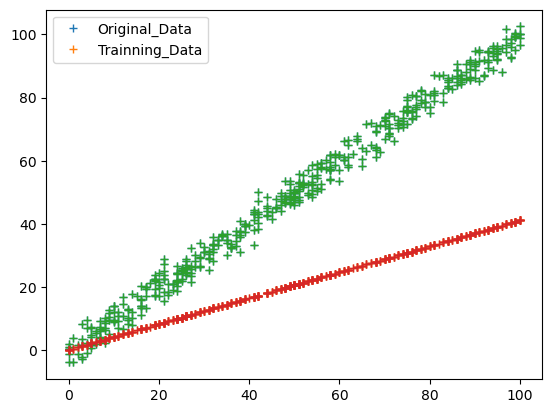

Iterations : 2, Loss : 257.80982030366096


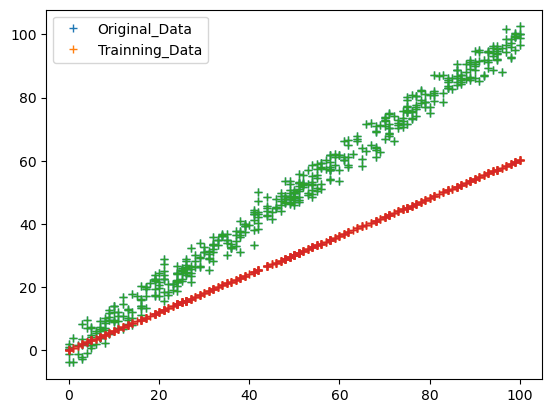

Iterations : 3, Loss : 119.11482739916835


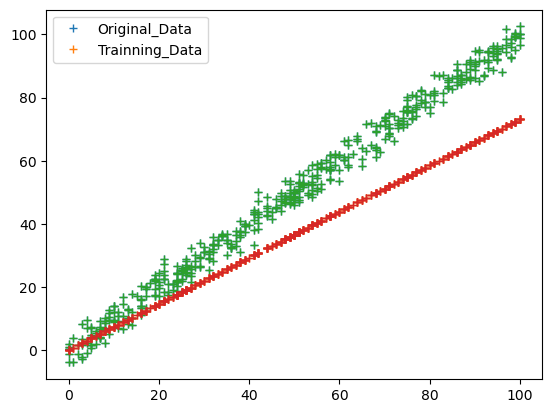

Iterations : 4, Loss : 56.188754990333145


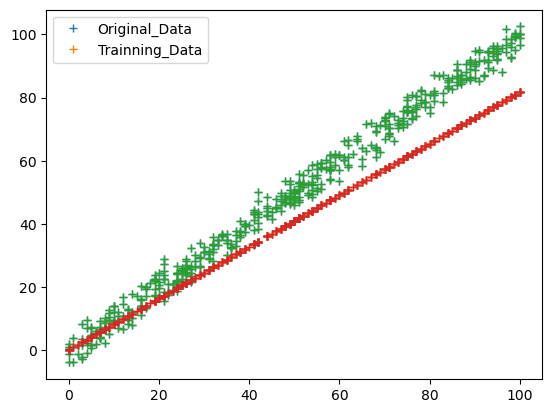

Iterations : 5, Loss : 27.639125735182162


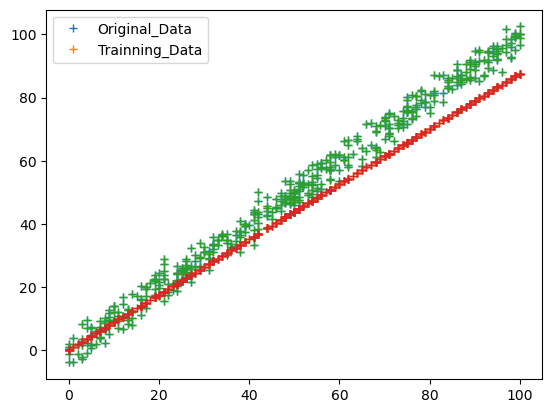

Iterations : 6, Loss : 14.686126815648276


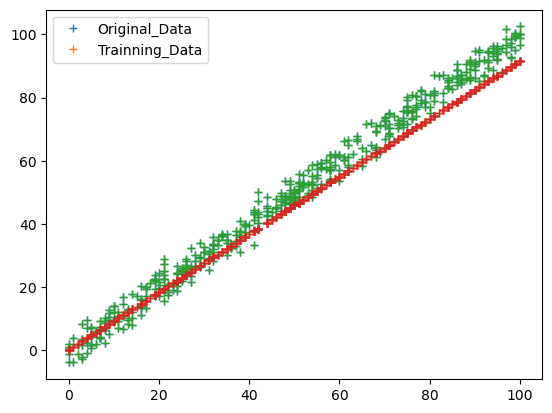

Iterations : 7, Loss : 8.809336354879825


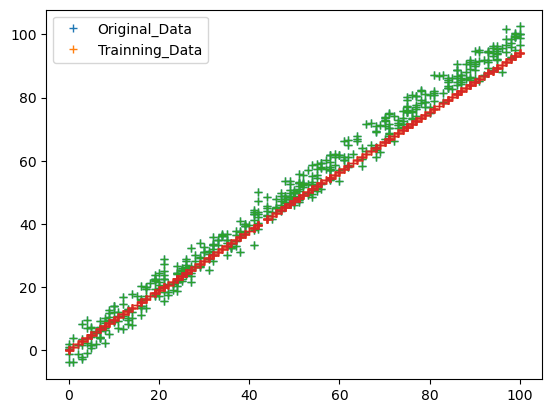

Iterations : 8, Loss : 6.143029509778721


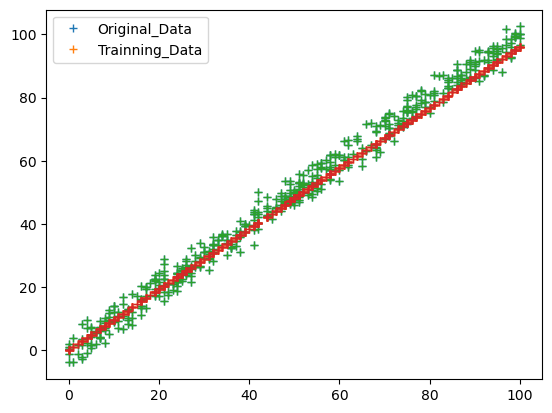

Iterations : 9, Loss : 4.933322637195254


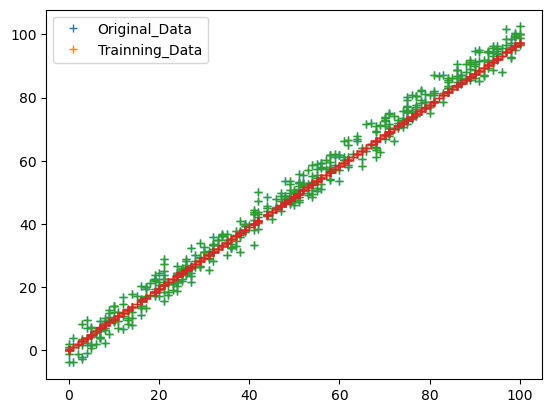

Iterations : 10, Loss : 4.38447678555856


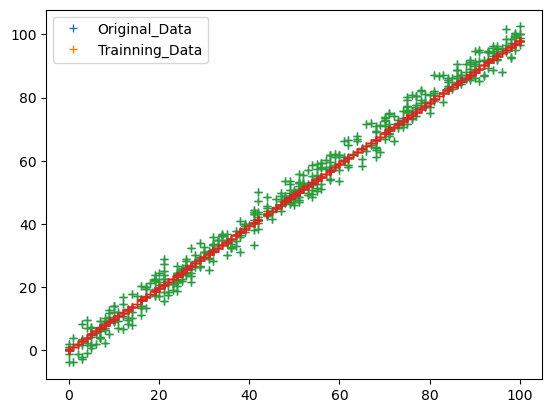

Iterations : 11, Loss : 4.135464311147705


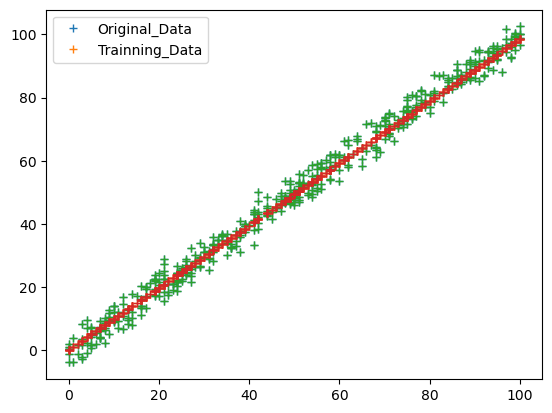

Iterations : 12, Loss : 4.022486572117378


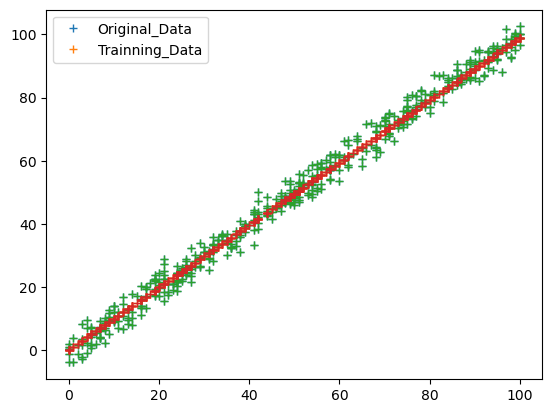

Iterations : 13, Loss : 3.9712279432322446


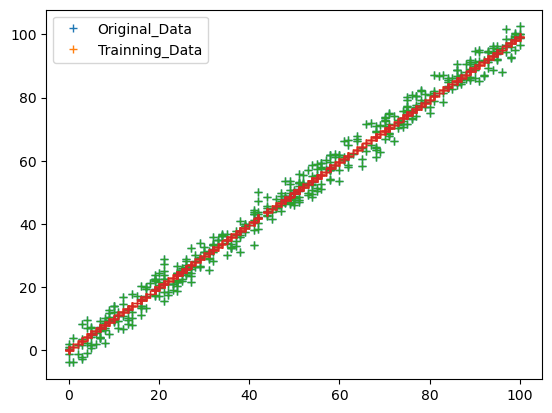

Iterations : 14, Loss : 3.947971343007983


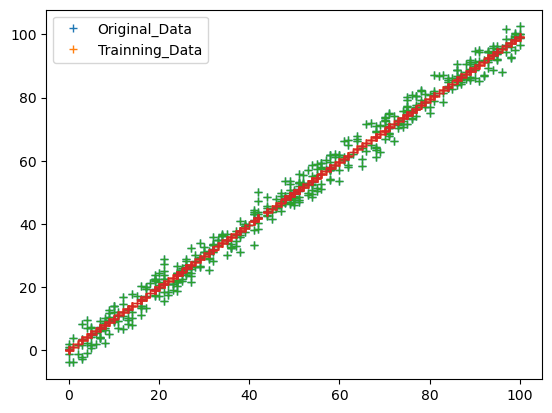

Iterations : 15, Loss : 3.9374192942287225


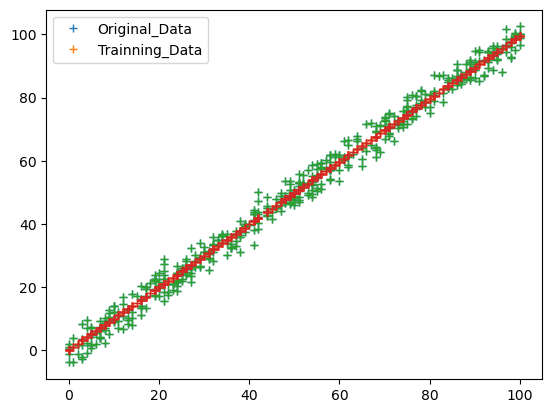

Iterations : 16, Loss : 3.932631314537507


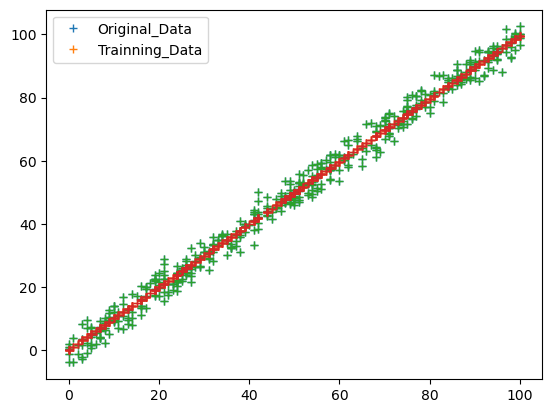

Iterations : 17, Loss : 3.9304584994014204


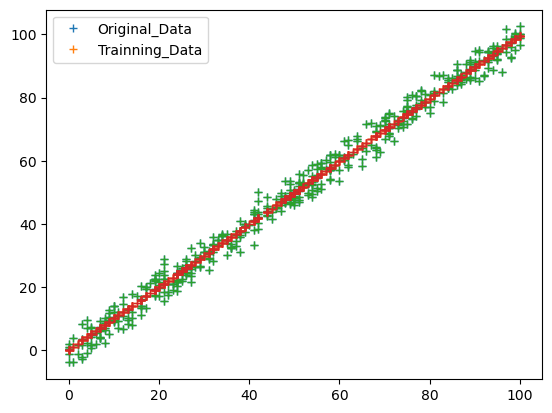

Iterations : 18, Loss : 3.9294721873460183


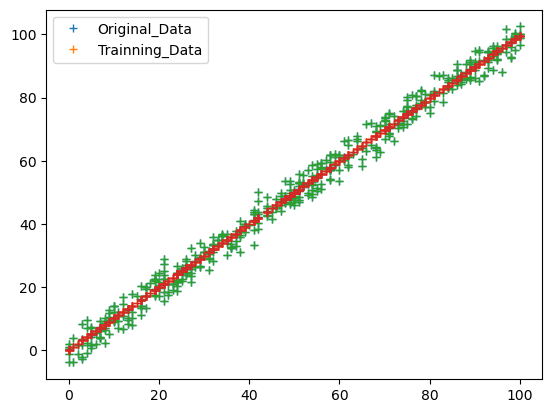

Iterations : 19, Loss : 3.929024193077902


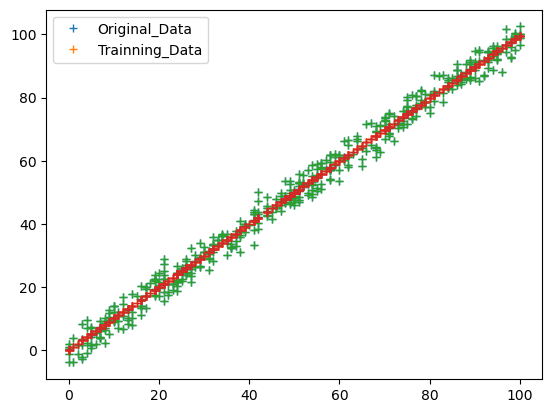

Iterations : 20, Loss : 3.928820434211499


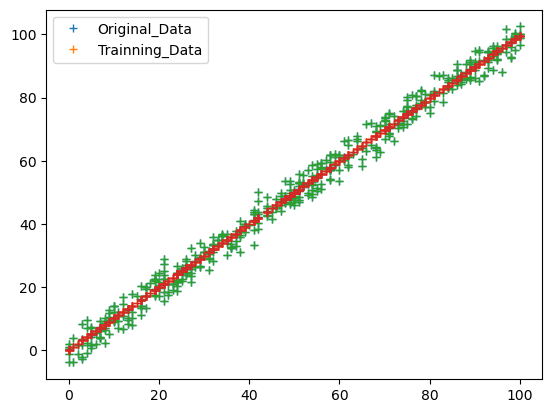

In [39]:
parameters = train(train_x, train_y, 0.0001, 20) # learning rate is usually really small, why 20 shown below.

Iterations : 1, Loss : 38.40404014790111


<Figure size 640x480 with 0 Axes>

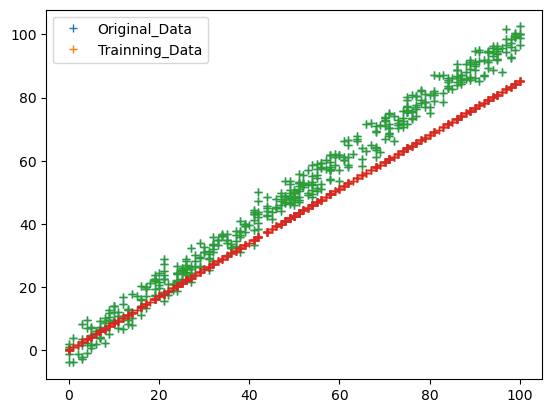

Iterations : 2, Loss : 3651840.1522362204


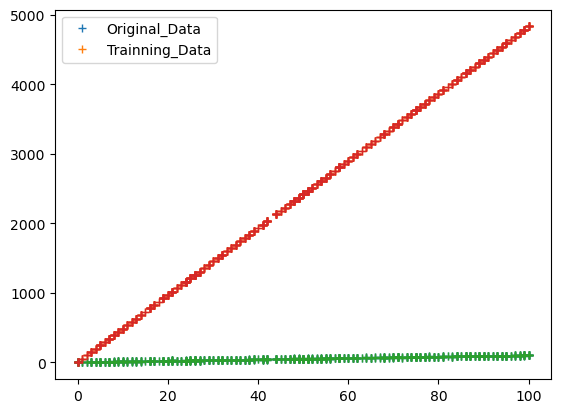

Iterations : 3, Loss : 386738515196.03973


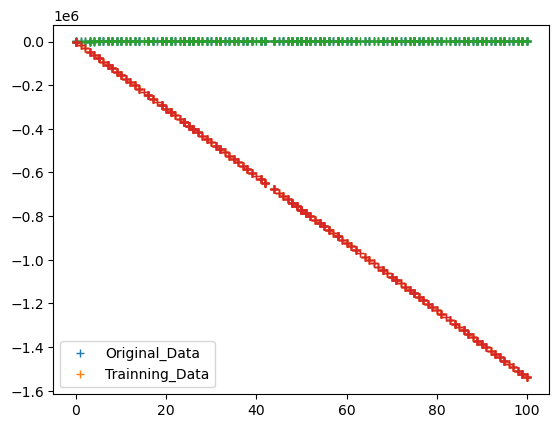

Iterations : 4, Loss : 4.095656805012179e+16


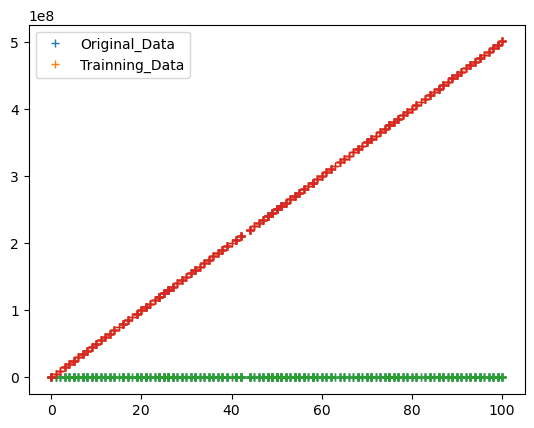

Iterations : 5, Loss : 4.3374021478335476e+21


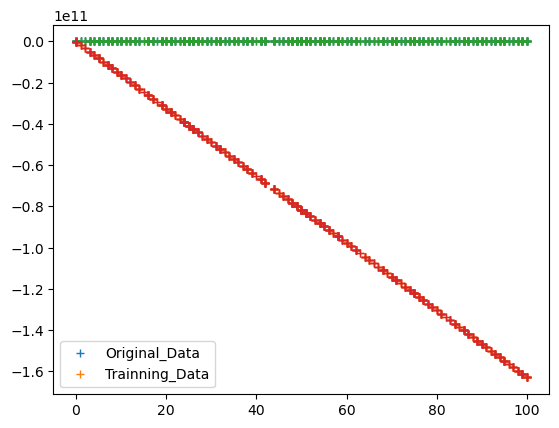

Iterations : 6, Loss : 4.593416462289526e+26


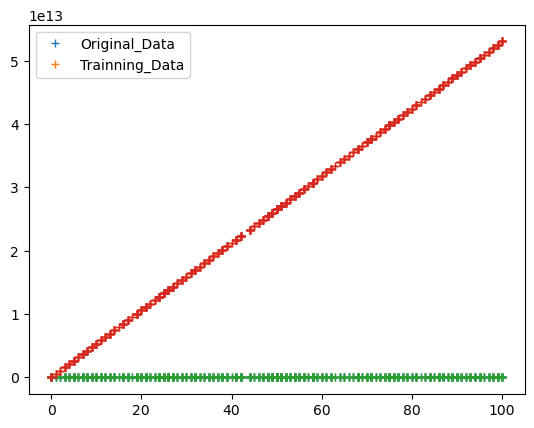

Iterations : 7, Loss : 4.864541971643378e+31


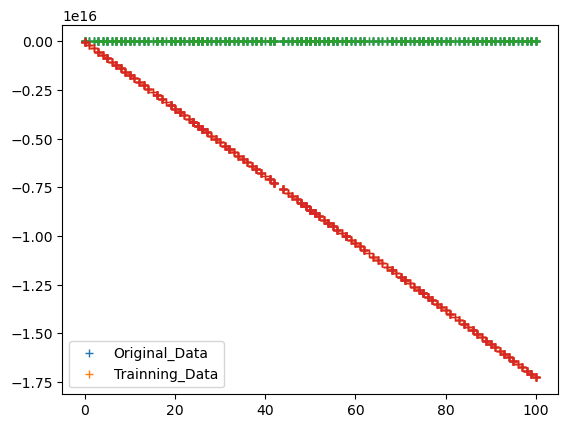

Iterations : 8, Loss : 5.151670611221949e+36


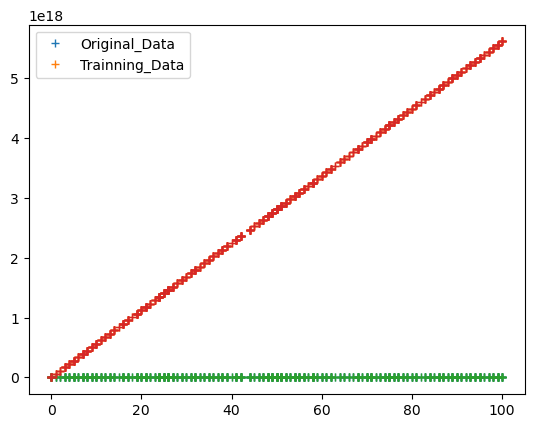

Iterations : 9, Loss : 5.4557469626605105e+41


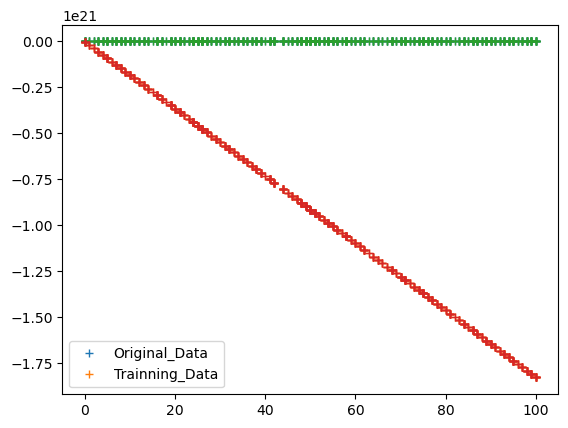

Iterations : 10, Loss : 5.77777136134083e+46


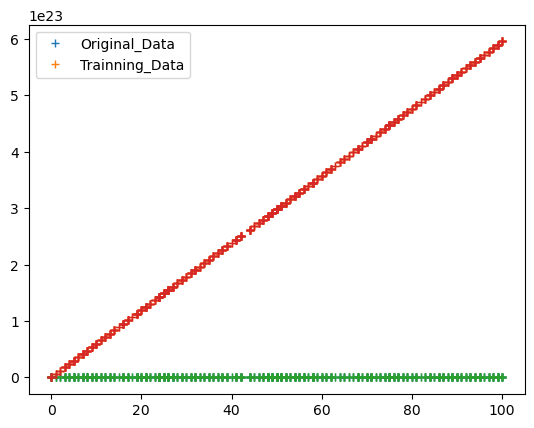

Iterations : 11, Loss : 6.118803187245167e+51


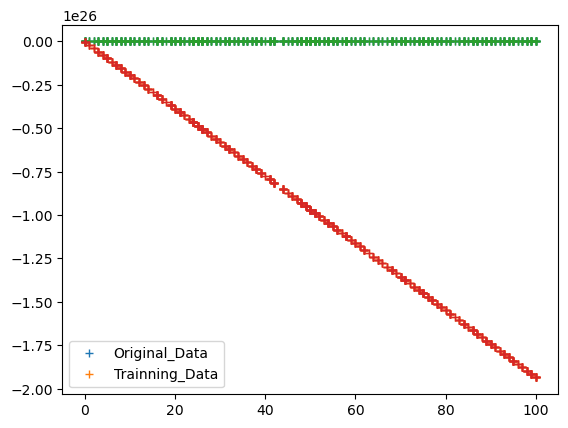

Iterations : 12, Loss : 6.479964350052281e+56


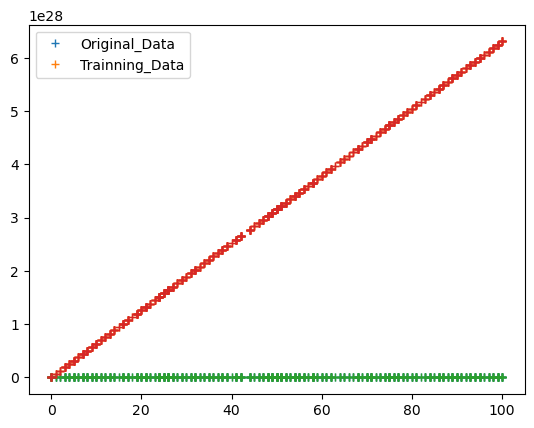

Iterations : 13, Loss : 6.862442979940552e+61


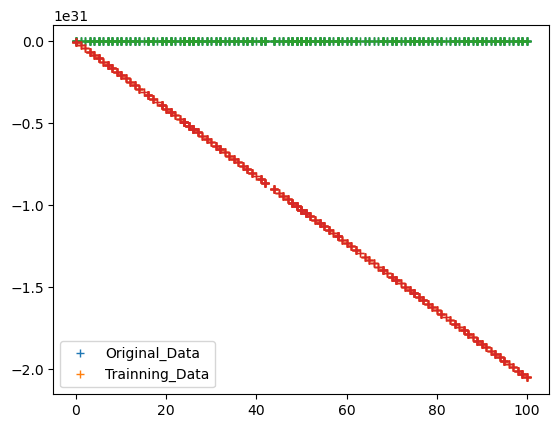

Iterations : 14, Loss : 7.26749733624004e+66


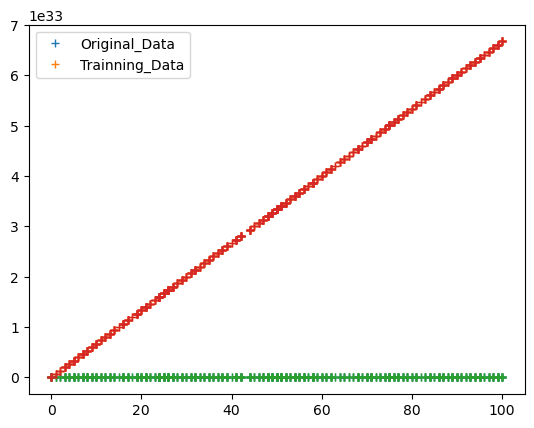

Iterations : 15, Loss : 7.696459946791951e+71


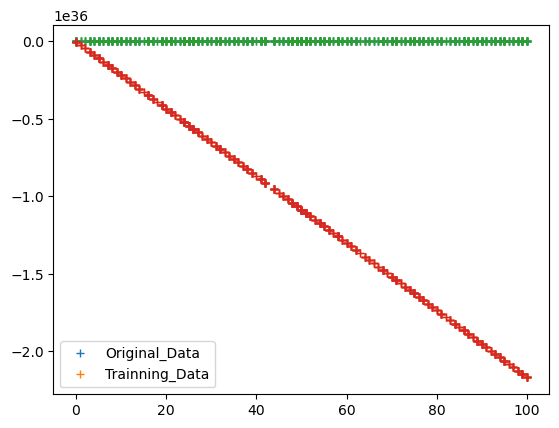

Iterations : 16, Loss : 8.150741991633017e+76


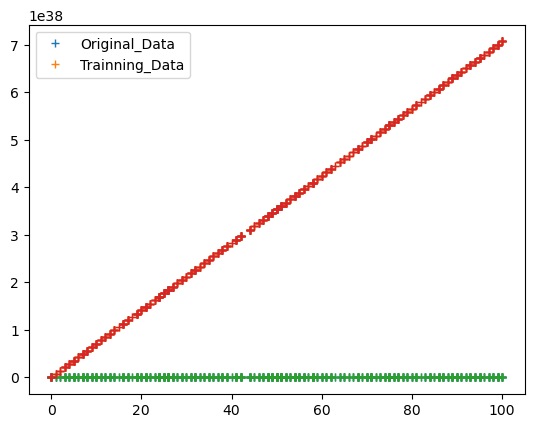

Iterations : 17, Loss : 8.631837945425948e+81


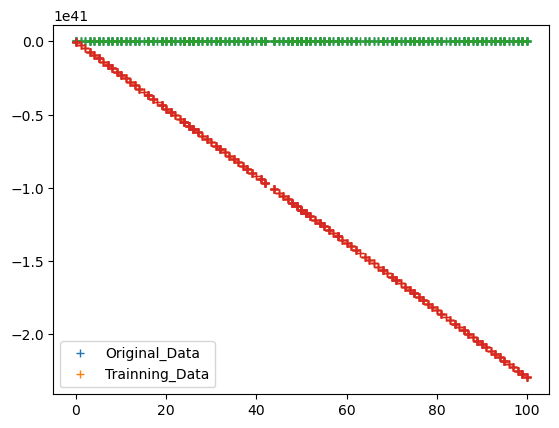

Iterations : 18, Loss : 9.141330493908478e+86


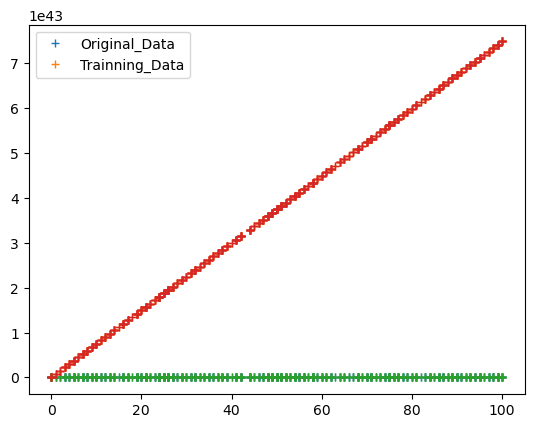

Iterations : 19, Loss : 9.680895740534839e+91


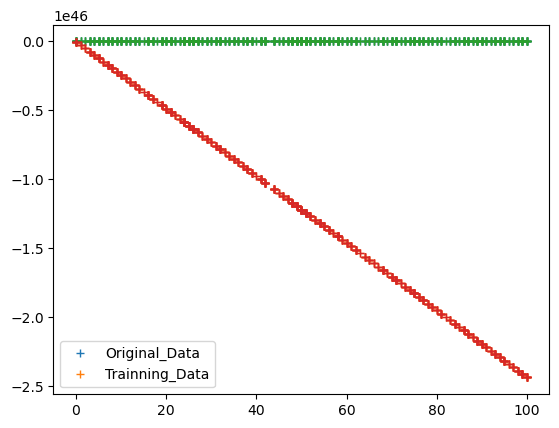

Iterations : 20, Loss : 1.0252308720438209e+97


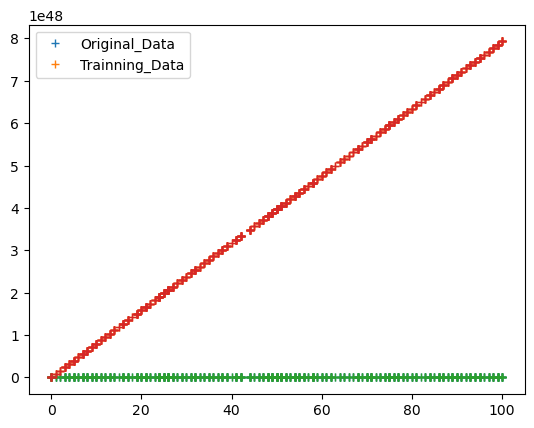

In [38]:
parameters1 = train(train_x, train_y, 0.1, 20)

In [40]:
print(parameters)

{'m': 0.9950131972495108, 'c': 0.14502176900677335}


# Predictions

In [41]:
test_predictions = test_x * parameters["m"] + parameters["c"]

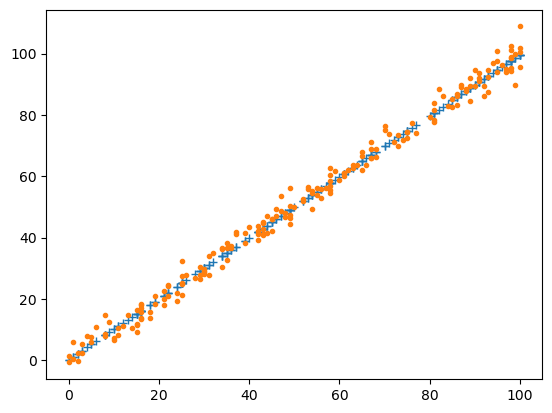

In [43]:
plt.plot(test_x, test_predictions, "+", label="Predictions")
plt.plot(test_x, test_y, ".", label="Original")
plt.show()

## Cost of our prediction

In [45]:
cost_func(test_y, test_predictions) #it is this much value plus or minus. I.e. our predictions are +-3.99 to actual values

3.995211453893376